# Week 6 Quiz

In [1]:
import os
import cv2
import scipy
import skimage
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

## 1)
Consider modifying Equation (6.3) from the lecture notes by removing internal
forces and making all scalar components of external forces equal to 1, such that
you are left with:
$$
C^t = C^{t-1} + N^{t-1}
$$

Assume you initialize a circular snake with a radius of 40 pixels and iteratively
evolve the snake 10 times. What is the area of Ωin (measured in square pixels)?

In [2]:
def make_circular_snake(N, center, radius):
    """ Initialize circular snake as a 2-by-N array."""
    center = center.reshape([2,1])
    angles = np.arange(N)*2*np.pi/N
    return(center+radius*np.array([np.cos(angles), np.sin(angles)]))

In [3]:
N = 100
center = np.array([100,100])
r = 40
snake = make_circular_snake(N, center, r)

In [4]:
def normalize(n):
    return n/np.sqrt(np.sum(n**2,axis=0))
    
def snake_normals(snake):
    """ Returns snake normals. Expects snake to be 2-by-N array."""
    ds = normalize(np.roll(snake, 1, axis=1) - snake) 
    tangent = normalize(np.roll(ds,-1,axis=1) + ds)
    normal = tangent[[1,0],:]*np.array([-1,1]).reshape([2,1])
    return(normal)

In [5]:
evolved_snake = snake.copy()

for i in range(10):
    evolved_snake = evolved_snake + snake_normals(evolved_snake)

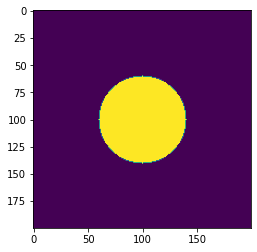

In [6]:
mask = skimage.draw.polygon2mask((200, 200), snake.T)
plt.imshow(mask)

In [7]:
max(snake[0,:])

140.0

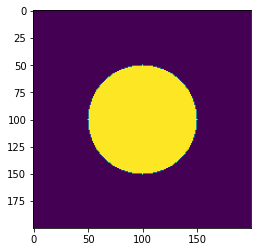

In [8]:
mask = skimage.draw.polygon2mask((200, 200), evolved_snake.T)
plt.imshow(mask)

In [9]:
max(evolved_snake[0,:])

150.0

We see that since there are no internal forces and the external forces are equal to 1, then the circle simply expands by 1 for each iteration and goes from a radius of 40 to a radius of 50 after the 10 iterations of evolving the snake. Therefore we get the area:

In [10]:
np.pi * (40+10)**2

7853.981633974483

## 2)
Consider the image plusplus.png with data type transformed to double precision by dividing all pixel intensities with 255. Initialize a circular snake with a
radius of 180 pixels in the centre of the image. What is the value of $m_{in}$?

C:\Users\s183921\AppData\Local\Temp/ipykernel_5688/1814608296.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = io.imread(os.path.join('..', 'solutions', 'Data', 'week6', 'data', 'plusplus.png')).astype(np.float)


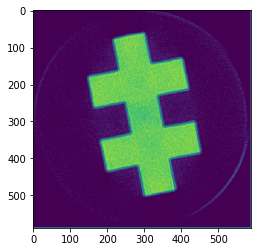

In [11]:
I = io.imread(os.path.join('..', 'solutions', 'Data', 'week6', 'data', 'plusplus.png')).astype(np.float)

#Normalizing image intensities
I = np.mean(I,axis=2)/255
plt.imshow(I)

In [12]:
snake = make_circular_snake(200, np.array(I.shape)/2, 180)

$m_{in}$ is the mean intensity of the inside of the snake, so:

In [13]:
mask = skimage.draw.polygon2mask(I.shape, snake.T).astype(bool)
m_in = I[mask].mean()
m_in

0.4794628226822675

## 3)
For the same image and the same curve, what is the value of $E_{ext}$ according to
the first equation in the Section 6.1 of the course note?


In [14]:
m_out = I[~mask].mean()
m_out

0.03568745582620023

In [16]:
#Piecewise constant Mumford-Shah function/model for external energy
E_ext = np.sum((I[mask] - m_in)**2) + np.sum((I[~mask] - m_out)**2)
E_ext

17542.20775689966